## Exploratory Exercises With Zillow

In [1]:
# imports


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from env import sql_connexion

from sklearn.model_selection import train_test_split
from prepare import tts


In [2]:
zil = pd.read_csv('zillow.csv')
zil.head()

/var/folders/v1/7y2hc6q17wl2rjlpg8h9g78h0000gn/T/ipykernel_2169/3270428742.py:1: DtypeWarning: Columns (64) have mixed types. Specify dtype option on import or set low_memory=False.
  zil = pd.read_csv('zillow.csv')


,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,id.1,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,14297519,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1727539,NaN,...,0,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,17052889,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1387261,NaN,...,1,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,14186244,NaN,NaN,261.0,NaN,NaN,NaN,NaN,11677,NaN,...,2,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,12177905,NaN,NaN,261.0,2.0,NaN,NaN,NaN,2288172,NaN,...,3,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,10887214,NaN,NaN,266.0,2.0,NaN,NaN,1.0,1970746,NaN,...,4,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [3]:
zil.dtypes

parcelid                          int64
typeconstructiontypeid          float64
storytypeid                     float64
propertylandusetypeid           float64
heatingorsystemtypeid           float64
buildingclasstypeid             float64
architecturalstyletypeid        float64
airconditioningtypeid           float64
id                                int64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64


In [4]:
# cleaning up the df

zil.isna().sum()

parcelid                            0
typeconstructiontypeid          77356
storytypeid                     77529
propertylandusetypeid               0
heatingorsystemtypeid           28008
buildingclasstypeid             77564
architecturalstyletypeid        77372
airconditioningtypeid           52572
id                                  0
basementsqft                    77529
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           27770
calculatedbathnbr                 616
decktypeid                      76965
finishedfloor1squarefeet        71542
calculatedfinishedsquarefeet      201
finishedsquarefeet12             3656
finishedsquarefeet13            77537
finishedsquarefeet15            74552
finishedsquarefeet50            71542
finishedsquarefeet6             77193
fips                                0
fireplacecnt                    69290
fullbathcnt                       616
garagecarcnt                    52059
garagetotals

In [5]:
zil.drop(columns = ['id.1', 'parcelid'], inplace = True)

In [6]:
zil.shape

# 77579 x 67

(77579, 67)

In [7]:
# keeping rows with infor for at least 30 of the 67 columns

zil.isna().sum()

typeconstructiontypeid          77356
storytypeid                     77529
propertylandusetypeid               0
heatingorsystemtypeid           28008
buildingclasstypeid             77564
architecturalstyletypeid        77372
airconditioningtypeid           52572
id                                  0
basementsqft                    77529
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           27770
calculatedbathnbr                 616
decktypeid                      76965
finishedfloor1squarefeet        71542
calculatedfinishedsquarefeet      201
finishedsquarefeet12             3656
finishedsquarefeet13            77537
finishedsquarefeet15            74552
finishedsquarefeet50            71542
finishedsquarefeet6             77193
fips                                0
fireplacecnt                    69290
fullbathcnt                       616
garagecarcnt                    52059
garagetotalsqft                 52059
hashottubors

In [8]:
# null_counter

def missing_rows(df):
    
    # converting 0, blanks, nulls to nan
    df = df.replace([' ', 'NULL'], np.nan)

    # creating df of rows with null values
    missing_rows = df.isna()
    
    # finding sum of each row
    missing_num_rows = missing_rows.sum()
    
    # finding the percentage of missing rows
    pc_missing_rows = (df.isna().mean().round(4))
    
    # creating dataframe with the missing row-numbers
    df = pd.DataFrame(missing_num_rows)
    
    # adding the pc to the missing df
    df['pc_missing'] = pc_missing_rows

    # renaming the 0 column
    df = df.rename(columns = {0 : 'num_missing_rows'})
    
    # sorting to have lowest pc missing at the top
    df.sort_values('pc_missing', ascending = False, inplace = True)
    
    return df
    

In [9]:
missing = missing_rows(zil)
missing.head(3)

,num_missing_rows,pc_missing
buildingclassdesc,77564,0.9998
buildingclasstypeid,77564,0.9998
finishedsquarefeet13,77537,0.9995


In [10]:
zil.isna().sum()


typeconstructiontypeid          77356
storytypeid                     77529
propertylandusetypeid               0
heatingorsystemtypeid           28008
buildingclasstypeid             77564
architecturalstyletypeid        77372
airconditioningtypeid           52572
id                                  0
basementsqft                    77529
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           27770
calculatedbathnbr                 616
decktypeid                      76965
finishedfloor1squarefeet        71542
calculatedfinishedsquarefeet      201
finishedsquarefeet12             3656
finishedsquarefeet13            77537
finishedsquarefeet15            74552
finishedsquarefeet50            71542
finishedsquarefeet6             77193
fips                                0
fireplacecnt                    69290
fullbathcnt                       616
garagecarcnt                    52059
garagetotalsqft                 52059
hashottubors

In [12]:
# dropping columns with 35 or more non-nulls

zil = zil.dropna(thresh = 35)
zil.isna().sum()

typeconstructiontypeid          31923
storytypeid                     32096
propertylandusetypeid               0
heatingorsystemtypeid            4801
buildingclasstypeid             32142
architecturalstyletypeid        31938
airconditioningtypeid            9275
id                                  0
basementsqft                    32096
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid            6021
calculatedbathnbr                   7
decktypeid                      31638
finishedfloor1squarefeet        28790
calculatedfinishedsquarefeet        0
finishedsquarefeet12              222
finishedsquarefeet13            32145
finishedsquarefeet15            31927
finishedsquarefeet50            28790
finishedsquarefeet6             32141
fips                                0
fireplacecnt                    27762
fullbathcnt                         7
garagecarcnt                    26498
garagetotalsqft                 26498
hashottubors

In [16]:
# splitting into tvt

train, val, test = tts(zil)
train.shape, val.shape, test.shape


((18001, 67), (7715, 67), (6429, 67))

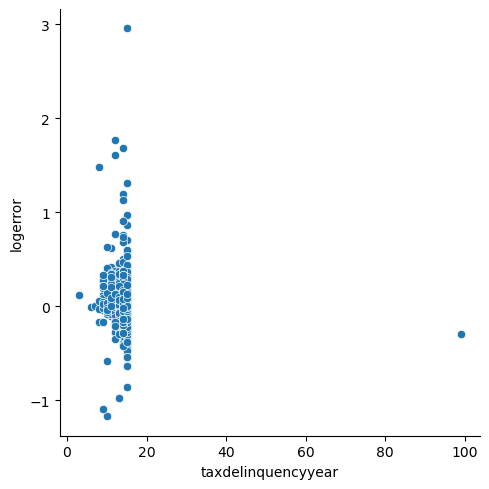

In [19]:
# plotting taxdelinquencyyear against logerror

sns.relplot(data = train, x = 'taxdelinquencyyear', y = 'logerror')

<AxesSubplot:xlabel='numberofstories', ylabel='logerror'>

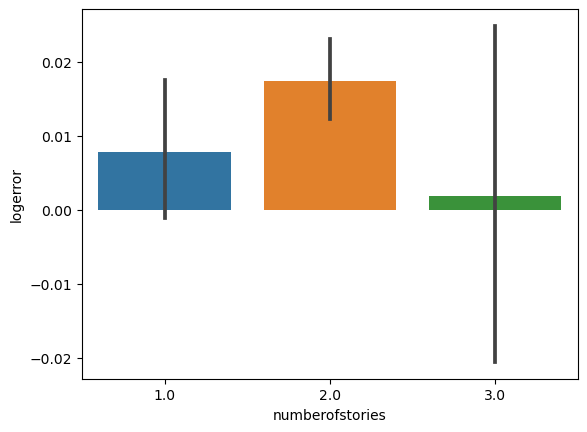

In [30]:
# plotting taxdelinquencyyear against logerror

sns.barplot(data = train, x = 'numberofstories', y = 'logerror')

<AxesSubplot:xlabel='logerror', ylabel='architecturalstyletypeid'>

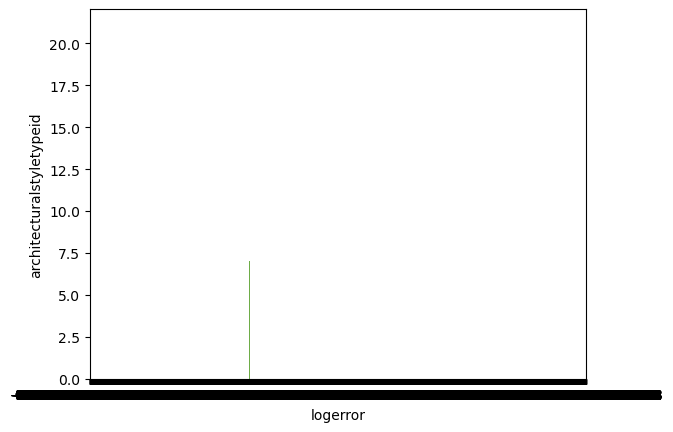

In [29]:
# plotting architecturalstyletypeid against logerror

sns.barplot(data = train, y = 'architecturalstyletypeid', x = 'logerror')

<AxesSubplot:xlabel='typeconstructiontypeid', ylabel='logerror'>

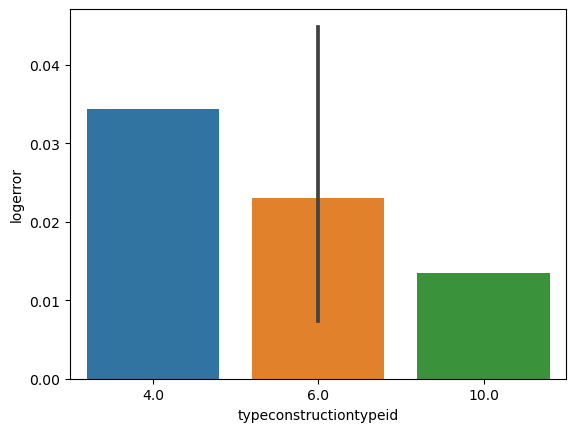

In [23]:
# plotting typeconstructiontypeid against logerror

sns.barplot(data = train, x = 'typeconstructiontypeid', y = 'logerror')